In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("./Dataset/Training/CIC_IDS_2017_trainX.csv")
y_train = pd.read_csv("./Dataset/Training/CIC_IDS_2017_trainY.csv")

In [3]:
X_train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,435101,11,9,502,4076,198,0,45.636364,76.357413,...,340,4,0.0,0.0,0,0,0.0,0.0,0,0
1,80,84692281,6,8,393,11595,375,0,65.500000,151.651904,...,235,3,12021.0,0.0,12021,12021,84500000.0,0.0,84500000,84500000
2,2035,78,1,1,2,6,2,2,2.000000,0.000000,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0
3,22,1467387,39,46,2568,6954,408,0,65.846154,103.092585,...,245,24,0.0,0.0,0,0,0.0,0.0,0,0
4,53,31235,2,2,74,238,37,37,37.000000,0.000000,...,-1,1,0.0,0.0,0,0,0.0,0.0,0,0


In [4]:
y_train.head()

,binary_label
0,0
1,1
2,1
3,0
4,0


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[6.75974670e-03, 3.62594136e-03, 4.55046005e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22072175e-03, 7.05769050e-01, 2.27523003e-05, ...,
        0.00000000e+00, 7.04166667e-01, 7.04166667e-01],
       [3.10521096e-02, 7.49999938e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22072175e-03, 6.44914946e-03, 9.10092010e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.17174029e-04, 7.99999933e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22072175e-03, 6.75271860e-01, 3.18532204e-05, ...,
        5.56148423e-01, 5.88333333e-01, 8.44348833e-02]])

In [6]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_train_reshaped

array([[[6.75974670e-03],
        [3.62594136e-03],
        [4.55046005e-05],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22072175e-03],
        [7.05769050e-01],
        [2.27523003e-05],
        ...,
        [0.00000000e+00],
        [7.04166667e-01],
        [7.04166667e-01]],

       [[3.10521096e-02],
        [7.49999938e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[1.22072175e-03],
        [6.44914946e-03],
        [9.10092010e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[7.17174029e-04],
        [7.99999933e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22072175e-03],
        [6.75271860e-01],
        [3.18532204e-05],
        ...,
        [5.56148423e-01],
        [5.8833

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Using a LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(60, 1)))

# Using dropout to prevent overfitting
model.add(Dropout(0.3))

model.add(LSTM(64))


# Adding a dense layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Using Sigmoid in Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52,033
Trainable params: 52,033
Non-traina

In [8]:
import tensorflow as tf

def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float32'))
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float32'))
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float32'))

    precision = tp / (tp + fp + 1e-7)
    recall = tp / (tp + fn + 1e-7)

    return 2 * (precision * recall) / (precision + recall + 1e-7)

In [9]:
X_test = pd.read_csv("./Dataset/Testing/CIC_IDS_2017_testX.csv")
y_test = pd.read_csv("./Dataset/Testing/CIC_IDS_2017_testY.csv")

In [10]:
X_test.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53,85294,2,2,62,314,31,31,31.000000,0.000000,...,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
1,80,1031973,3,4,26,11601,20,0,8.666667,10.263203,...,229,2,0.0,0.0,0,0,0.0,0.0,0,0
2,37457,55,1,1,0,0,0,0,0.000000,0.000000,...,379,0,0.0,0.0,0,0,0.0,0.0,0,0
3,53,203,2,2,64,96,32,32,32.000000,0.000000,...,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
4,53,103416977,2,2,92,148,48,44,46.000000,2.828427,...,-1,1,30311.0,0.0,30311,30311,103000000.0,0.0,103000000,103000000


In [11]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[8.08740501e-04, 7.10891637e-04, 4.57337291e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22074038e-03, 8.59988298e-03, 9.14674582e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.71565905e-01, 5.66666643e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22074038e-03, 7.09986887e-02, 1.37201187e-05, ...,
        0.00000000e+00, 7.09981750e-02, 7.09981750e-02],
       [8.08740501e-04, 2.22499991e-06, 4.57337291e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.98672445e-02, 1.14999995e-06, 9.14674582e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [12]:
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
X_test_reshaped

array([[[8.08740501e-04],
        [7.10891637e-04],
        [4.57337291e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22074038e-03],
        [8.59988298e-03],
        [9.14674582e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[5.71565905e-01],
        [5.66666643e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[1.22074038e-03],
        [7.09986887e-02],
        [1.37201187e-05],
        ...,
        [0.00000000e+00],
        [7.09981750e-02],
        [7.09981750e-02]],

       [[8.08740501e-04],
        [2.22499991e-06],
        [4.57337291e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[4.98672445e-02],
        [1.14999995e-06],
        [9.14674582e-06],
        ...,
        [0.00000000e+00],
        [0.0000

In [13]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score])
history = model.fit(X_train_reshaped, y_train, batch_size=1024, epochs=40, validation_data=(X_test_reshaped, y_test), callbacks=[early_stop])

Epoch 1/40
2742/2742 [==============================] - 4133s 2s/step - loss: 0.2304 - accuracy: 0.8992 - precision: 0.8780 - recall: 0.9272 - f1_score: 0.9006 - val_loss: 0.1725 - val_accuracy: 0.9285 - val_precision: 0.7171 - val_recall: 0.9518 - val_f1_score: 0.8175
Epoch 2/40
2742/2742 [==============================] - 2317s 845ms/step - loss: 0.1190 - accuracy: 0.9541 - precision: 0.9358 - recall: 0.9751 - f1_score: 0.9550 - val_loss: 0.1119 - val_accuracy: 0.9561 - val_precision: 0.8142 - val_recall: 0.9587 - val_f1_score: 0.8802
Epoch 3/40
2742/2742 [==============================] - 2089s 762ms/step - loss: 0.1042 - accuracy: 0.9599 - precision: 0.9425 - recall: 0.9796 - f1_score: 0.9607 - val_loss: 0.1323 - val_accuracy: 0.9235 - val_precision: 0.6904 - val_recall: 0.9913 - val_f1_score: 0.8136
Epoch 4/40
2742/2742 [==============================] - 2092s 763ms/step - loss: 0.0910 - accuracy: 0.9649 - precision: 0.9470 - recall: 0.9849 - f1_score: 0.9656 - val_loss: 0.0966 - 

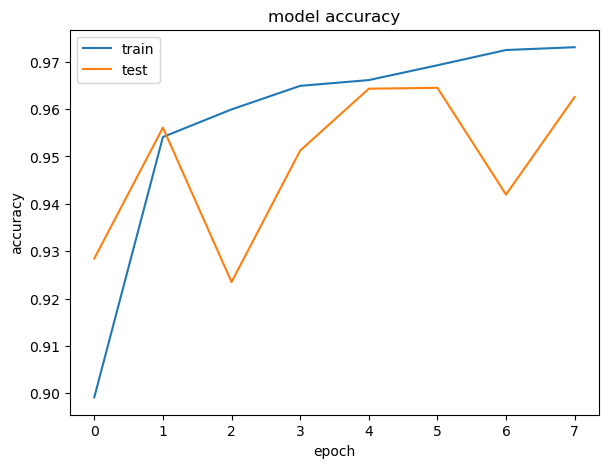

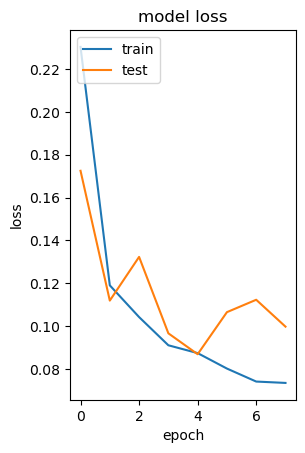

In [14]:
plt.figure(figsize=(15,5))

# History for accuracy
plt.subplot(1, 2, 1)
plt.title('model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# History for loss
plt.subplot(1, 2, 2)
plt.title('model loss')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
metric_data = {
    "Accuracy": history.history['val_accuracy'],
    "Precision": history.history['val_precision'],
    "Recall": history.history['val_recall'],
    "F1_score": history.history['val_f1_score'],
}

In [16]:
df = pd.DataFrame(metric_data)
df

,Accuracy,Precision,Recall,F1_score
0,0.928458,0.717082,0.951768,0.817546
1,0.956078,0.814173,0.958653,0.880248
2,0.923483,0.690407,0.991313,0.813587
3,0.951231,0.780508,0.989370,0.872348
4,0.964299,0.847316,0.961871,0.900733
5,0.964483,0.853330,0.953527,0.900414
6,0.941948,0.747039,0.992104,0.852021
7,0.962561,0.859574,0.930215,0.893264


In [17]:
import os

folder_name = 'Metrics'
try:
    os.mkdir(folder_name)
    print(f"Directory '{folder_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{folder_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{folder_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'Metrics' already exists.


In [18]:
df.index += 1
df

,Accuracy,Precision,Recall,F1_score
1,0.928458,0.717082,0.951768,0.817546
2,0.956078,0.814173,0.958653,0.880248
3,0.923483,0.690407,0.991313,0.813587
4,0.951231,0.780508,0.989370,0.872348
5,0.964299,0.847316,0.961871,0.900733
6,0.964483,0.853330,0.953527,0.900414
7,0.941948,0.747039,0.992104,0.852021
8,0.962561,0.859574,0.930215,0.893264


In [19]:
df.index.name = 'Epoch'
df

,Accuracy,Precision,Recall,F1_score
Epoch,,,,
1,0.928458,0.717082,0.951768,0.817546
2,0.956078,0.814173,0.958653,0.880248
3,0.923483,0.690407,0.991313,0.813587
4,0.951231,0.780508,0.989370,0.872348
5,0.964299,0.847316,0.961871,0.900733
6,0.964483,0.853330,0.953527,0.900414
7,0.941948,0.747039,0.992104,0.852021
8,0.962561,0.859574,0.930215,0.893264


In [20]:
df.to_csv('./Metrics/LSTM_metrics_w_epoch.csv')

In [22]:
folder_name = 'Models'
try:
    os.mkdir(folder_name)
    print(f"Directory '{folder_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{folder_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{folder_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'Models' created successfully.


In [23]:
model.save('./Models/Base_LSTM.h5')
print("Model saved!")

Model saved!
